Basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?

Dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
import matplotlib.pyplot as mat
import seaborn as sea
%matplotlib inline

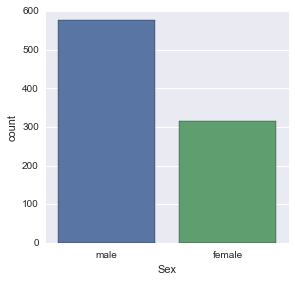

In [6]:
sea.factorplot('Sex', data = titanic_df, kind = 'count')

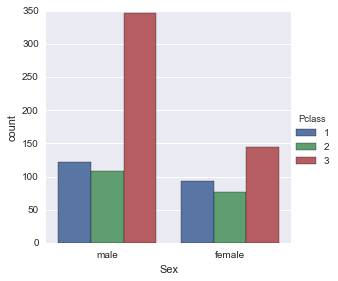

In [7]:
sea.factorplot('Sex', data = titanic_df, kind = 'count', hue = 'Pclass')

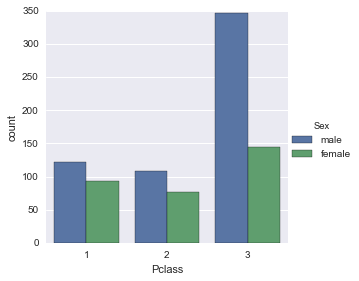

In [8]:
sea.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Sex')

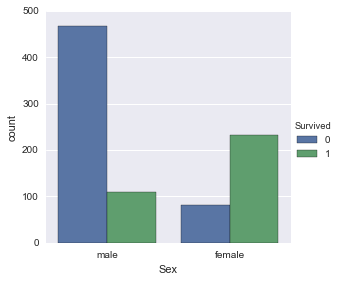

In [9]:
sea.factorplot('Sex', data = titanic_df, kind = 'count', hue = 'Survived')

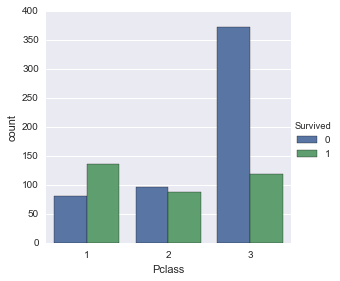

In [10]:
sea.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Survived')

In [11]:
#Original age
titanic_df['Age'].mean()

29.69911764705882

C:\Users\Jon\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


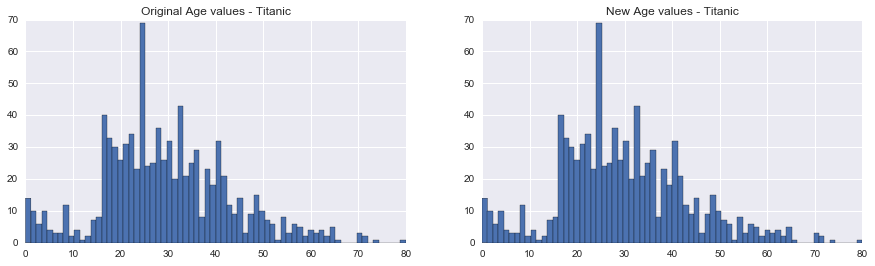

In [12]:
# Age 

fig, (axis1,axis2) = mat.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)

# plot original Age values
titanic_df['Age'].hist(bins=70, ax=axis1)

        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)


In [13]:
#Adjusted age
titanic_df['Age'].mean()

29.546576879910212

In [15]:
def male_female_child(passenger):
    sex, age = passenger
    if sex == 'female':
        if age < 16:
            return 1
        elif age >= 16:
            return 3
        else:
            return 3
    if sex == 'male':
        if age < 16:
            return 2
        elif age >= 16:
            return 4
        else:
            return 4

In [16]:
titanic_df['Person'] = titanic_df[['Sex', 'Age']].apply(male_female_child, axis=1)

In [17]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4
5,6,0,3,"Moran, Mr. James",male,23,0,0,330877,8.4583,NaN,Q,4
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,4
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1


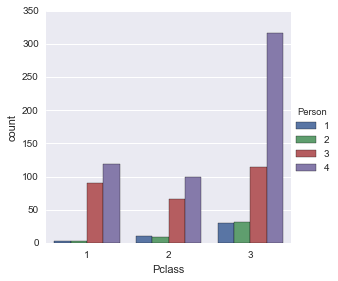

In [18]:
sea.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Person')

In [19]:
titanic_df['Person'].value_counts()

4    534
3    271
2     43
1     43
Name: Person, dtype: int64

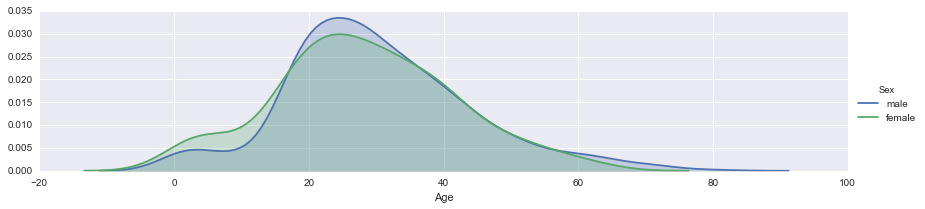

In [20]:
fig = sea.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)
fig.map(sea.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set = ((0, oldest))

fig.add_legend()

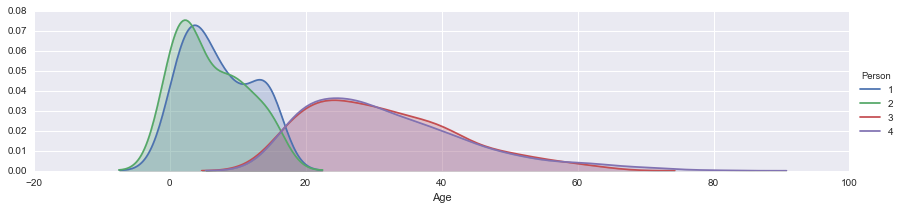

In [21]:
fig = sea.FacetGrid(titanic_df, hue = 'Person', aspect = 4)
fig.map(sea.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set = ((0, oldest))

fig.add_legend()

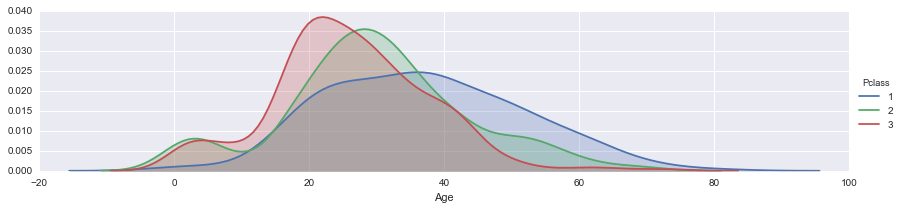

In [22]:
fig = sea.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sea.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set = ((0, oldest))

fig.add_legend()

In [23]:
#cabin column 
titanic_df['Deck'] = titanic_df['Cabin'].str[0]

In [24]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4,NaN
5,6,0,3,"Moran, Mr. James",male,23,0,0,330877,8.4583,NaN,Q,4,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,4,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,2,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,3,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1,NaN


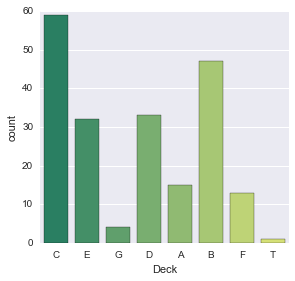

In [25]:
#Only need first letter of cabin for deck
#levels = []

#for level in deck:
    #levels.append(level[0])

#cabin_df = DataFrame(levels)
#cabin_df.columns = ['Cabin']

sea.factorplot('Deck', data = titanic_df, palette = 'summer', kind = 'count')

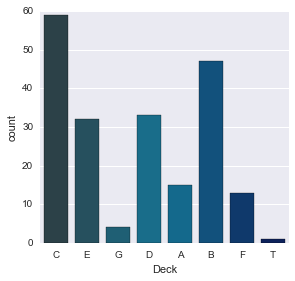

In [26]:
sea.factorplot('Deck', data = titanic_df, palette = 'ocean_d', kind = 'count')

C:\Users\Jon\Anaconda2\lib\site-packages\seaborn\categorical.py:3304: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


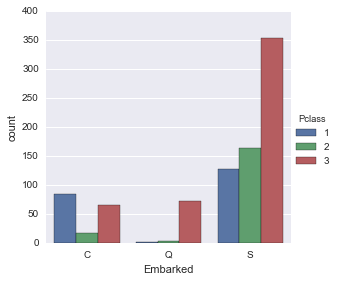

In [27]:
sea.factorplot('Embarked', data = titanic_df, hue = 'Pclass', x_order = ['C', 'Q', 'S'], kind = 'count')

In [28]:
#Who was alone, who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4,NaN


In [29]:
titanic_df['Travel'] = titanic_df.SibSp + titanic_df.Parch

In [30]:
titanic_df['Travel'].loc[titanic_df['Travel'] > 0] = 'Family'
titanic_df['Travel'].loc[titanic_df['Travel'] == 0] = 'Alone'

C:\Users\Jon\Anaconda2\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck,Travel
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4,NaN,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,C,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3,NaN,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,C,Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4,NaN,Alone


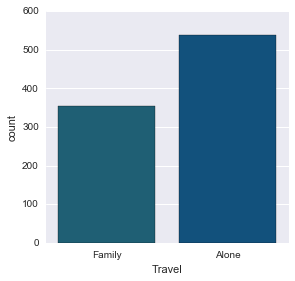

In [32]:
sea.factorplot('Travel', data = titanic_df, kind = 'count', palette = 'ocean_d')

In [33]:
titanic_df['Outcome'] = titanic_df.Survived.map({0:'Jack', 1:'Rose'})

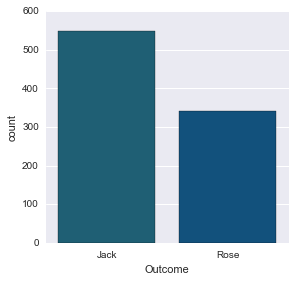

In [34]:
sea.factorplot('Outcome', data = titanic_df, palette = 'ocean_d', kind = 'count')

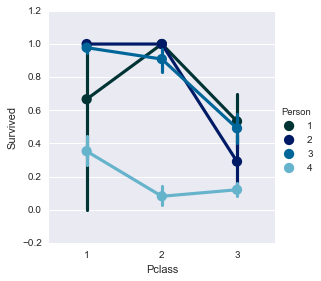

In [35]:
sea.factorplot('Pclass', 'Survived', hue = 'Person', data = titanic_df, palette = 'ocean')

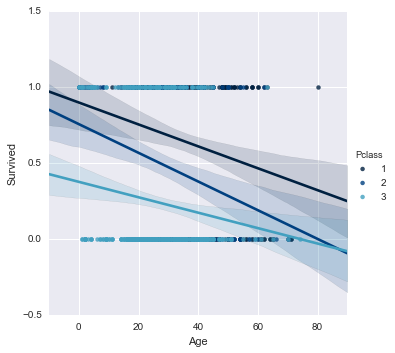

In [36]:
sea.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'ocean')

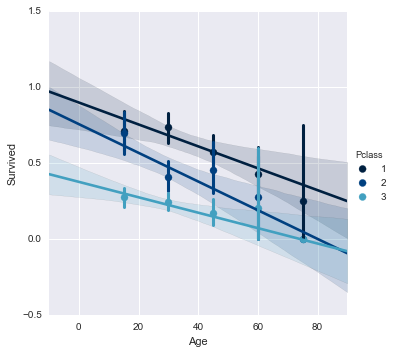

In [37]:
generations = [15,30,45,60,75,90]
sea.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'ocean', x_bins = generations)

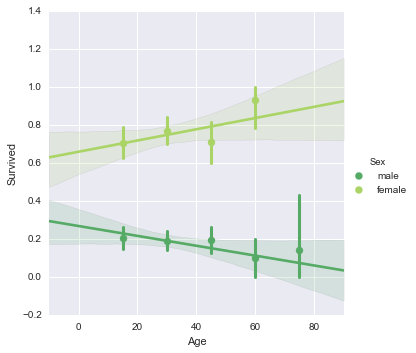

In [38]:
sea.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'summer', x_bins = generations)

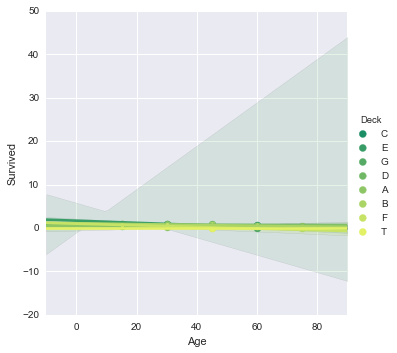

In [39]:
sea.lmplot('Age', 'Survived', hue = 'Deck', data = titanic_df, palette = 'summer', x_bins = generations)

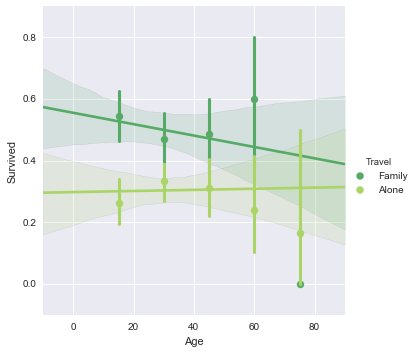

In [40]:
sea.lmplot('Age', 'Survived', hue = 'Travel', data = titanic_df, palette = 'summer', x_bins = generations)

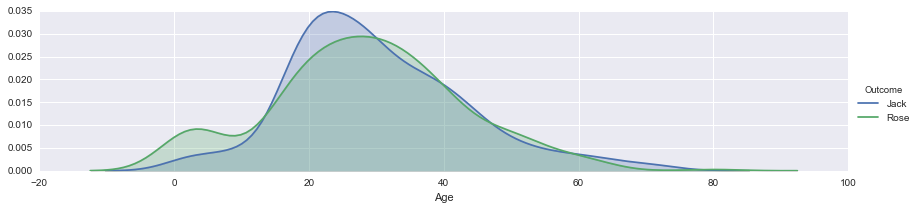

In [41]:
fig = sea.FacetGrid(titanic_df, hue = 'Outcome', aspect = 4)
fig.map(sea.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set = ((0, oldest))

fig.add_legend()

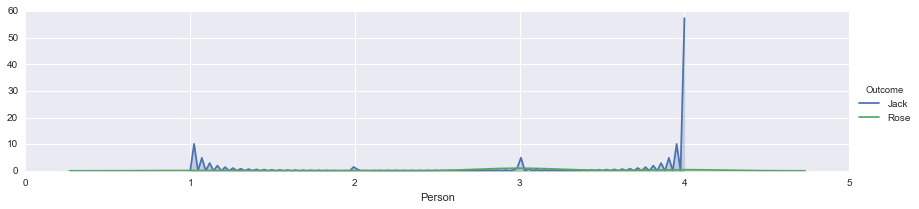

In [42]:
fig = sea.FacetGrid(titanic_df, hue = 'Outcome', aspect = 4)
fig.map(sea.kdeplot, 'Person', shade = True)

fig.set = ((1, 4))

fig.add_legend()

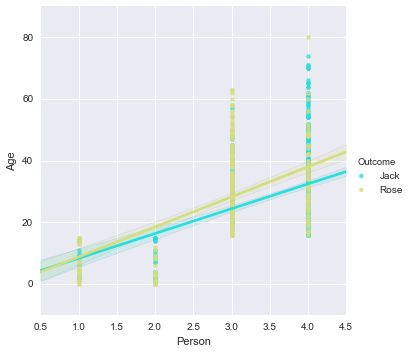

In [43]:
sea.lmplot('Person', 'Age', hue = 'Outcome', data = titanic_df, palette = 'rainbow')

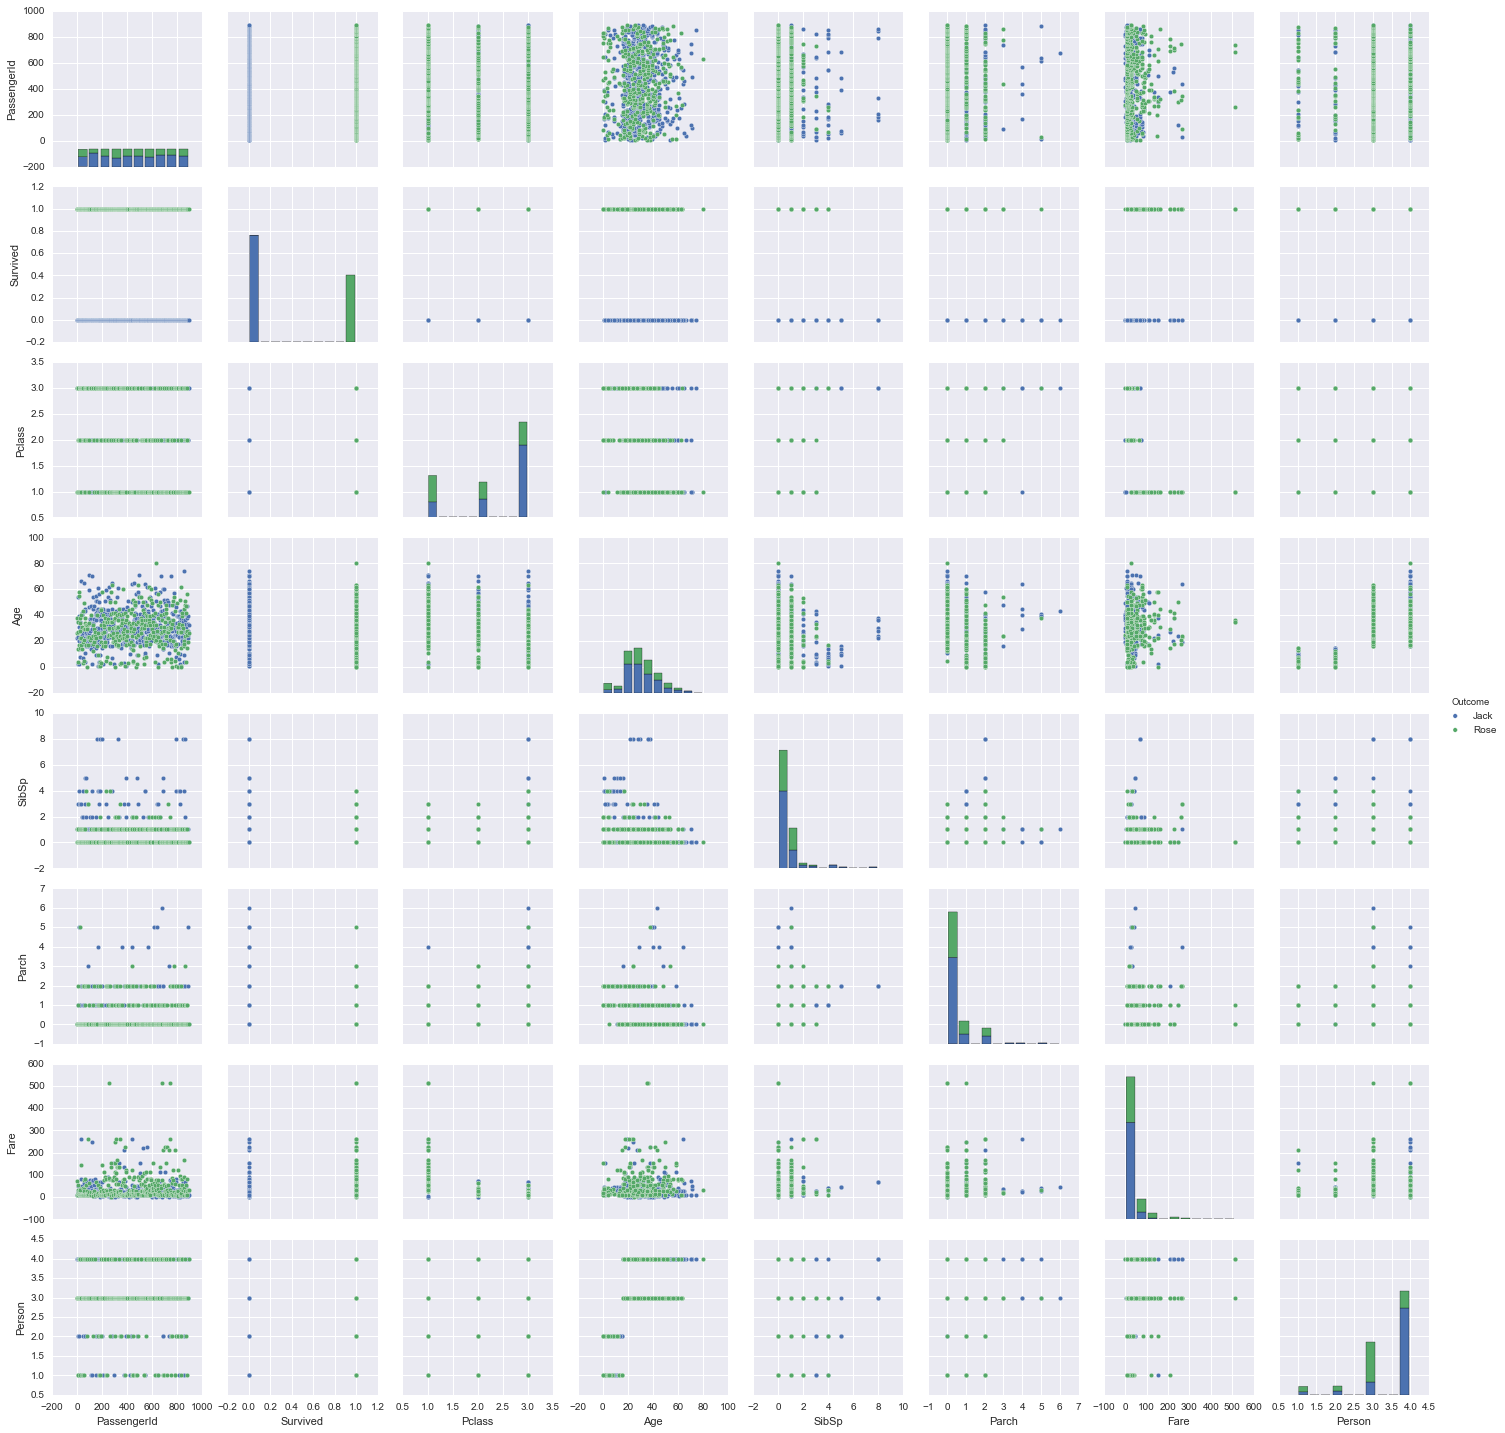

In [49]:
sea.pairplot(titanic_df, hue = 'Outcome')

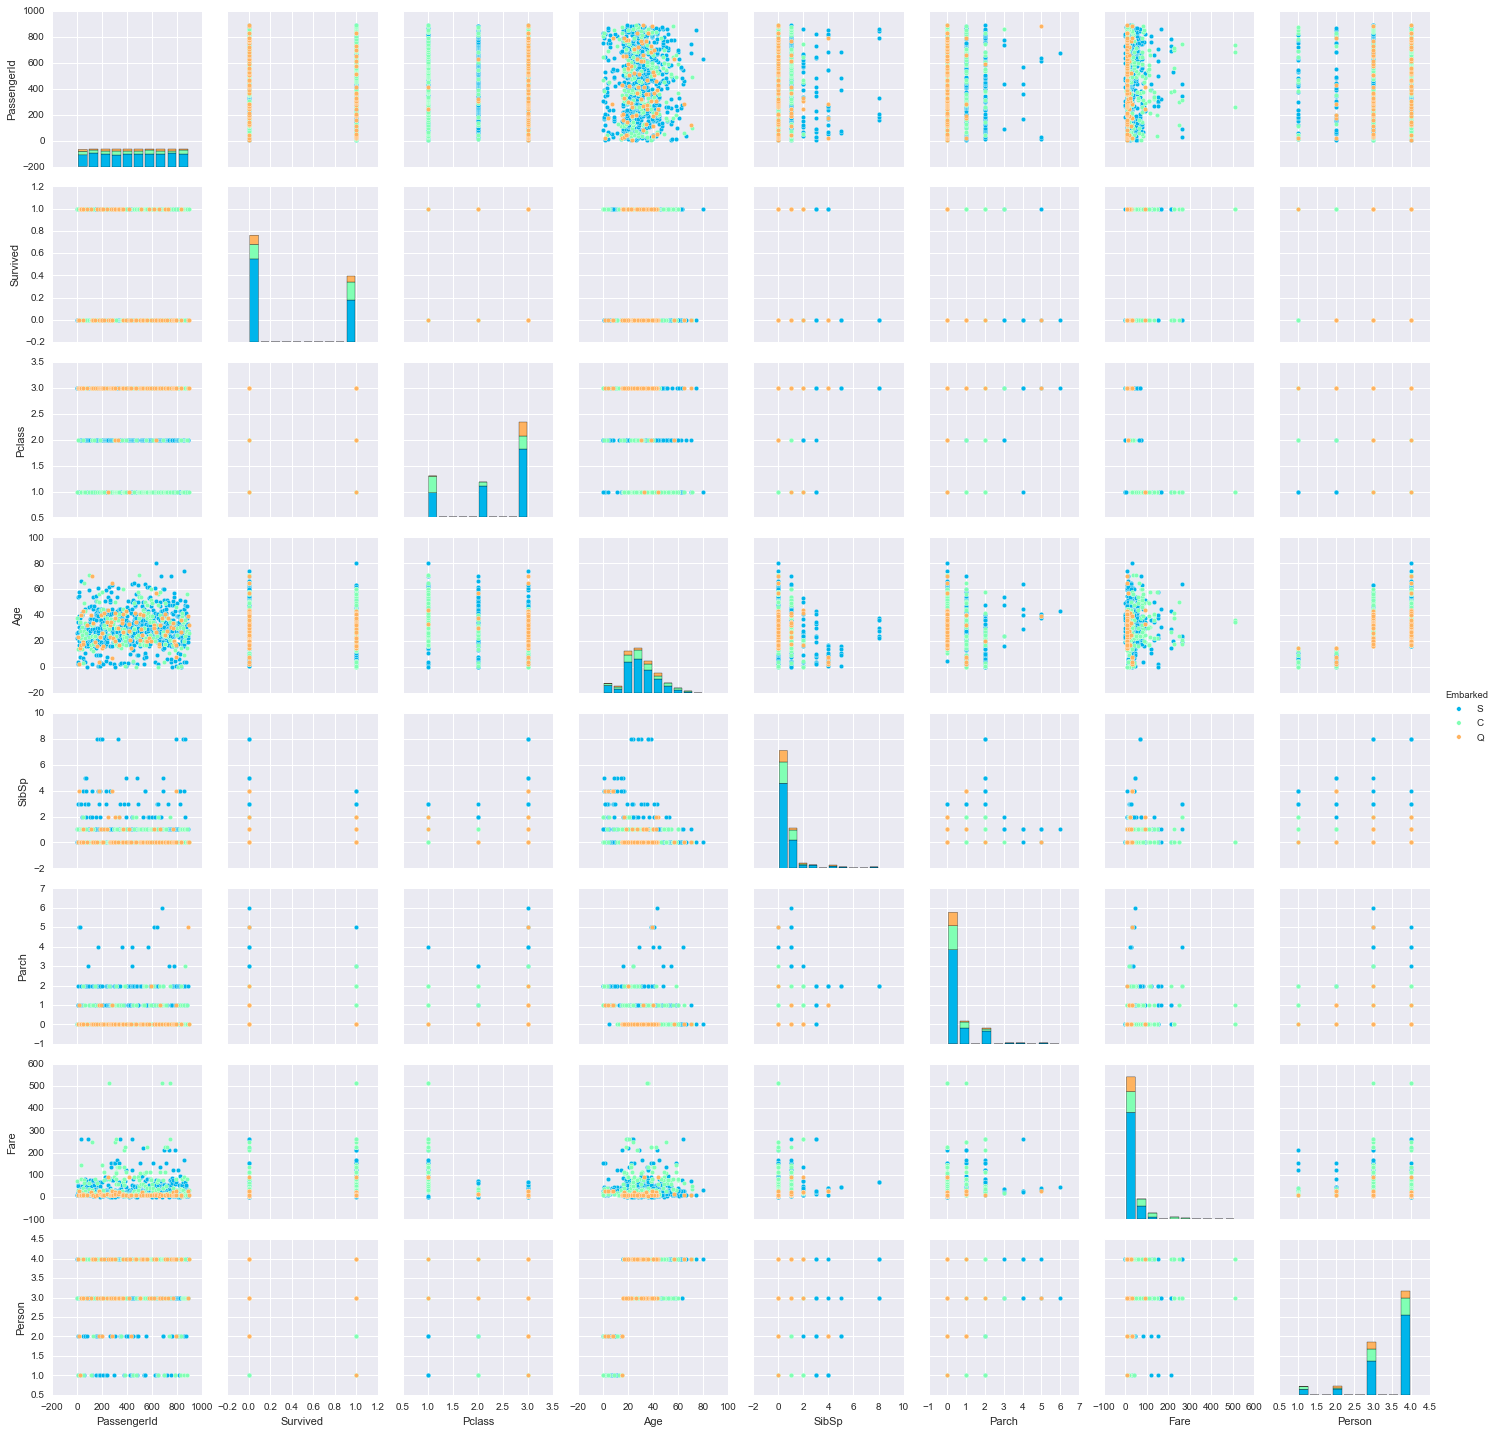

In [52]:
sea.pairplot(titanic_df, hue = 'Embarked', palette = 'rainbow')